In [1]:
from TATools import *

In [113]:
N = 20
x = np.linspace(0,1,N)
y = (-1)**np.linspace(0,N-1,N)

In [114]:
repetitions = 1
n_wires = 1

In [115]:
dev = qml.device('default.qubit', wires=n_wires)

In [145]:
@qml.qnode(dev)
def circ(xi, params):
    qml.RY(params[0], wires=0)
    qml.RZ(params[1], wires=0)

    qml.Hadamard(wires=0)
    qml.RZ(params[2]*xi, wires=0)

    return qml.state()

In [147]:
params = 2*np.pi*np.random.rand(3)
print(params)

[1.50709232 4.04957062 1.07718273]


In [148]:
circ(x[0],params)

tensor([-0.43833149-0.02862071j, -0.01396646-0.89824902j], requires_grad=True)

In [149]:
def kernel_matrix(X, params, kernel_circ, assume_normalized_kernel=False):
    states = np.array([kernel_circ(x, params) for x in X])
    
    N = len(X)
    matrix = [0] * N**2

    for i in range(N):
        for j in range(i, N):
            if assume_normalized_kernel and i == j:
                matrix[N * i + j] = 1.0
            else:
                matrix[N * i + j] = np.abs(np.dot(states[i],np.conj(states[j])))**2
                matrix[N * j + i] = matrix[N * i + j]

    return np.array(matrix).reshape((N, N))

def target_alignment_matrix(ker_matrix, Y, rescale_class_labels=True):
    
    K = ker_matrix

    if rescale_class_labels:
        nplus = np.count_nonzero(np.array(Y) == 1)
        nminus = len(Y) - nplus
        _Y = np.array([y / nplus if y == 1 else y / nminus for y in Y])
    else:
        _Y = np.array(Y)

    T = np.outer(_Y, _Y)
    inner_product = np.sum(K * T)
    norm = np.sqrt(np.sum(K * K) * np.sum(T * T))
    inner_product = inner_product / norm

    return inner_product

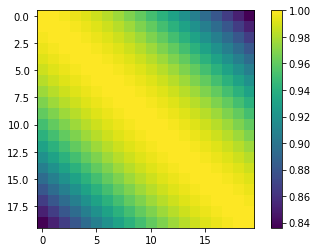

In [150]:
ker_matrix = kernel_matrix(x, params, circ)

plt.imshow(ker_matrix)
plt.colorbar()

In [151]:
target_alignment_matrix(ker_matrix, y)

tensor(0.00023199, requires_grad=True)

In [232]:
N_points_x = 100
N_points_y = 100
p0 = np.linspace(0,2*np.pi,N_points_y)
p1 = np.linspace(0,2*np.pi,N_points_y)
p2 = np.linspace(0,2*np.pi*(N-1),N_points_x)

In [233]:
# N_points = 150
# # p = 4*np.pi*np.linspace(0,1,N_points)
# p = np.linspace(0,2*np.pi*(N-1),N_points)

In [234]:
# TAs_diff_p1 = []
# for pk in p1:
#     TAs = np.zeros((N_points_x, N_points_y))
#     for i, pi in enumerate(p0):
#         for j, pj in enumerate(p2):
#             ker_matrix = kernel_matrix(x, [pi,pk,pj], circ)
#             TAs[j,i]=target_alignment_matrix(ker_matrix, y)
#     TAs_diff_p1.append(TAs)

In [235]:
TAs = np.zeros((N_points_x, N_points_y))
for i, pi in enumerate(p0):
    for j, pj in enumerate(p1):
        ker_matrix = kernel_matrix(x, [pi,pj,np.pi*(N-1)], circ)
        TAs[j,i]=target_alignment_matrix(ker_matrix, y)

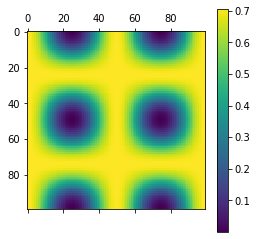

In [236]:
plt.matshow(TAs)
plt.colorbar()

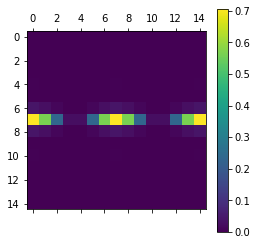

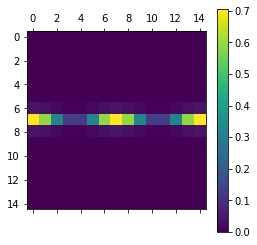

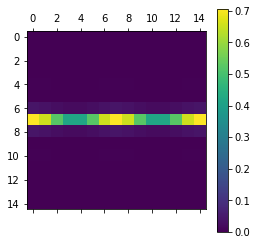

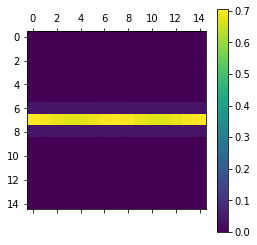

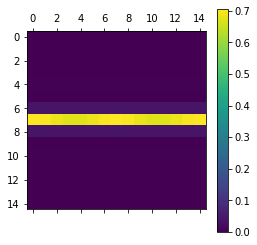

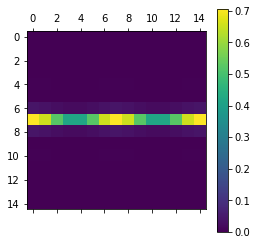

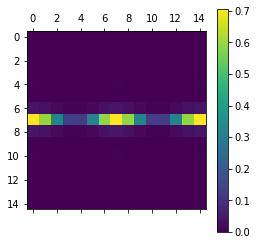

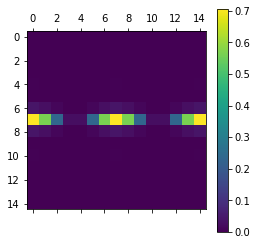

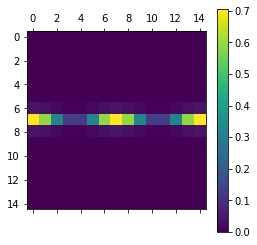

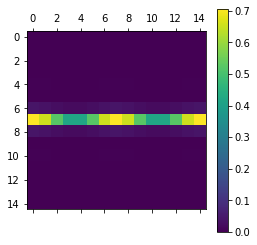

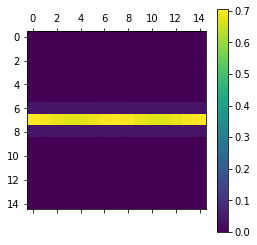

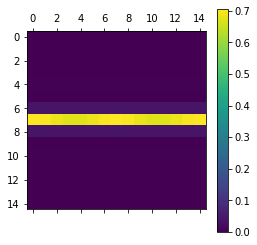

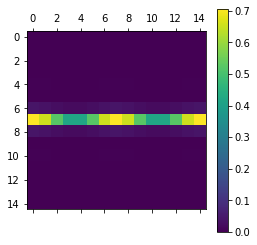

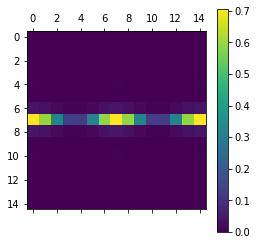

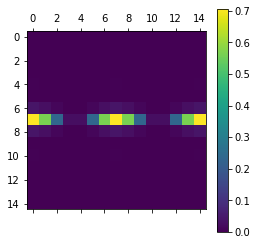

In [229]:
# for i in range(N_points_y):
#     plt.matshow(TAs_diff_p1[i])
#     plt.colorbar()

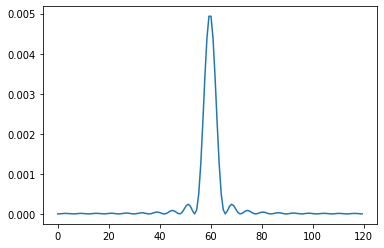

In [194]:
# plt.plot(p2, TAs)